<a href="https://colab.research.google.com/github/voltanz/PCVK_Ganjil_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Ahmad Bima Tristan Ibrahim**

**NIM: 214172077**

**No. Absen: 01**

**Kelas: TI-3F**



> # **E. Pengayaan Materi KTP**



1.
Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

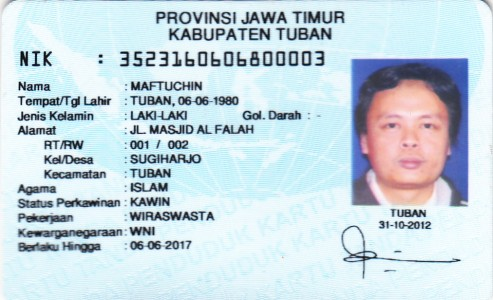

2. Muat 2 library berikut sebagai tahapan persiapan

In [11]:
import cv2
import os

3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut

In [4]:
# Lokasi hasil pelat
path_plate = ("/content/drive/MyDrive/PCVK/Week 11")
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
  src = cv2.imread(os.path.join(path_plate, name_file))
  blurred = src.copy()
  gray = blurred.copy()

4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi

In [5]:
# Filtering
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra (thresholding)

In [6]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

88.0 (338, 600)


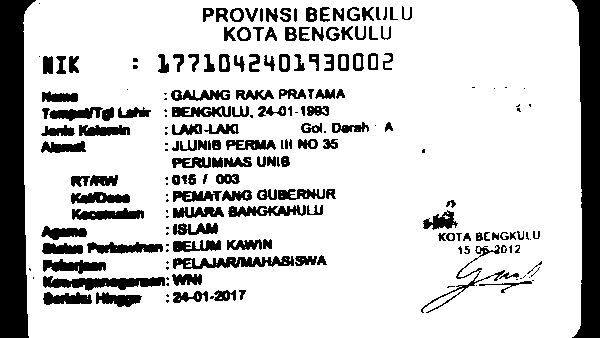

In [12]:
src = cv2.imread("/content/drive/MyDrive/PCVK/Week 11/ktp.png")

erode = cv2.erode(bw.copy(),cv2.getStructuringElement(cv2.MORPH_OPEN,(1,1)))

cv2_imshow(erode)

6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

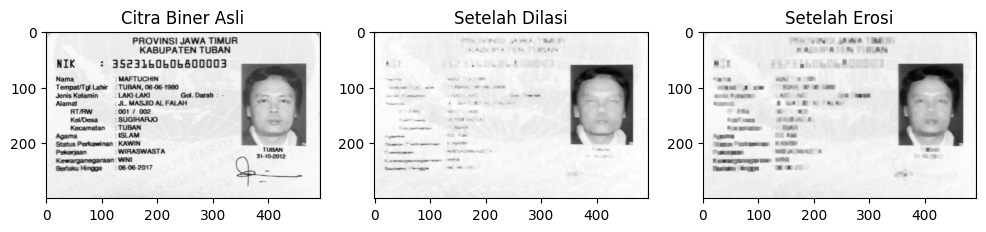

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra biner
binary_image = cv2.imread('/content/drive/MyDrive/PCVK/Week 11/ktp.png', cv2.IMREAD_GRAYSCALE)

# Definisikan kernel untuk operasi morfologi
kernel = np.ones((5, 5), np.uint8)  # Anda dapat menyesuaikan ukuran kernel sesuai kebutuhan

# Lakukan operasi dilasi
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

# Lakukan operasi erosi
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

# Tampilkan citra asli dan hasil morfologi
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Biner Asli')

plt.subplot(132)
plt.imshow(dilated_image, cmap='gray')
plt.title('Setelah Dilasi')

plt.subplot(133)
plt.imshow(eroded_image, cmap='gray')
plt.title('Setelah Erosi')

plt.show()

7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek. Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik (karena hasil akuisisi setiap citra dapat berbeda).

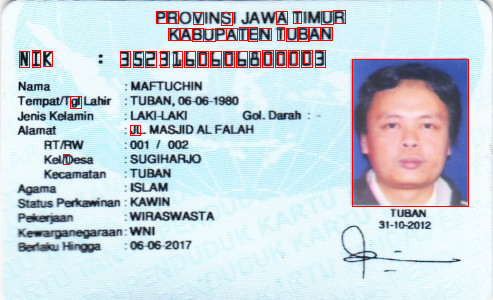

In [13]:
import cv2

# Baca gambar KTP
ktpImage = cv2.imread('/content/drive/MyDrive/PCVK/Week 11/ktp.png')

# Ubah gambar menjadi skala abu-abu untuk deteksi tepi
gray = cv2.cvtColor(ktpImage, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # (5, 5) adalah ukuran kernel Gaussian, dan 0 adalah deviation

# Thresholding untuk membuat gambar biner
ret, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

# Temukan kontur pada gambar tepi
contours,  hierarchy= cv2.findContours(thresholded, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada gambar asli
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(ktpImage, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
      cv2.rectangle(ktpImage, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Tampilkan gambar dengan kontur
cv2_imshow(ktpImage)

> # **F. Tugas Praktikum**

Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan secara berkelompok dengan aturan sebagai berikut:

Kelompok 1 – KTP Riyanto Sleman

Kelompok 2 – KTP Galang Raka Bengkulu

Kelompok 3 – KTP Arief Wijaya Cimahi

Kelompok 4 – KTP Edo Nias

Kelompok 5 – KTP Widiarso Bekasi

Kelompok 6 – KTP Abdurrauf Soppeng

88.0 (338, 600)


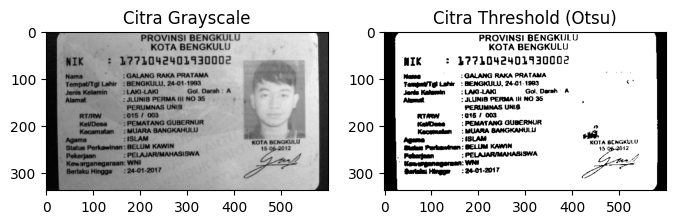

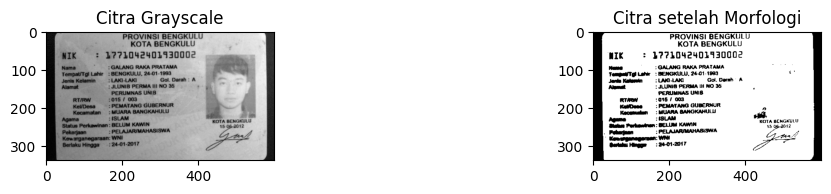

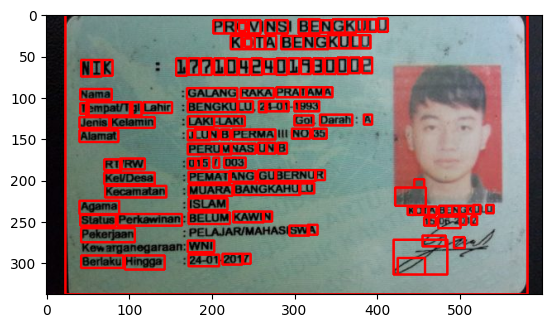

In [14]:
# Tugas Praktikum

import cv2
import os
import matplotlib.pyplot as plt

# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/Week 11"

# Nama file yang ingin di proses
ktp_1 = "ktp1.png"

# Looping file di direktori
if ktp_1 in os.listdir(path_plate):
    image_path = os.path.join(path_plate, ktp_1)
    src = cv2.imread(os.path.join(path_plate, ktp_1))
    blurred = src.copy()
    gray = blurred.copy()

# Filtering
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)

plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('Citra Grayscale')

plt.subplot(122)
plt.imshow(bw, cmap='gray')
plt.title('Citra Threshold (Otsu)')

plt.show()

# Operasi morfologi
kernel = np.ones((1, 1), np.uint8)
eroded_image = cv2.erode(bw, kernel, iterations=1)

# Tampilkan citra hasil morfologi
plt.figure(figsize=(10, 6))
plt.subplot(131)
plt.imshow(gray, cmap='gray')
plt.title('Citra Grayscale')

plt.subplot(133)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra setelah Morfologi')

plt.show()

# Load the image
image_path = os.path.join(path_plate, ktp_1)
image = cv2.imread(image_path)

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(eroded_image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
   x, y, w, h = cv2.boundingRect(cnt)
   ras = format(w / h, '.2f')
   if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
   elif h >= 10 and w >= 6 and float(ras) <= 6:
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
   elif h >= 15 and w >= 6 and float(ras) <= 7:
          cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

  # Menampilkan gambar image dengan kontur menggunakan plt
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()